<a href="https://colab.research.google.com/github/Madhav7871/ML-project/blob/main/Ml%20project-3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - ***MOBILE PRICE RANGE PREDICTION***



##### **Project Type**    - **Classification**
##### **Contribution**    - **Individual**
##### **Name - Madhav kalra**

# **Project Summary :**

The provided dataset offers a detailed overview of various mobile phone specifications, encompassing 21 distinct features that collectively influence the device's price range. This dataset is particularly valuable for manufacturers, retailers, and consumers, as it enables data-driven decision-making regarding pricing strategies, feature optimization, and purchasing choices. By analyzing these attributes, we can uncover patterns and correlations that determine how different specifications contribute to a phone's market positioning—whether budget, mid-range, high-end, or premium.

**Key Features and Their Significance**
The dataset can be broadly categorized into four major groups of features:

- Performance and Hardware Specifications
The core performance metrics of a smartphone are critical in determining its price. Attributes such as RAM (random access memory), battery power (mAh), processor speed (clock_speed), number of CPU cores (n_cores), and internal storage (int_memory) play a pivotal role in defining a phone's efficiency and multitasking capabilities. Higher RAM and storage capacities typically correlate with premium pricing, as they enhance the device's ability to handle demanding applications and store large amounts of data. Similarly, a faster processor and a higher number of cores improve performance, making the device more suitable for gaming and high-end applications.

- Camera and Display Quality
In today's smartphone market, camera and display quality are among the most influential factors affecting consumer preference and pricing. The dataset includes primary camera megapixels (pc), front camera megapixels (fc), pixel resolution (px_height and px_width), and screen dimensions (sc_h and sc_w). A higher-resolution camera and a larger, sharper display often justify a higher price point, as these features are heavily marketed and sought after by consumers.

- Connectivity and Additional Features
Modern smartphones come equipped with various connectivity options and additional functionalities that enhance user experience. The dataset accounts for Bluetooth support (blue), Wi-Fi compatibility (wifi), 4G and 3G support (four_g and three_g), dual SIM capability (dual_sim), and touchscreen functionality (touch_screen). While some of these features (like Wi-Fi and Bluetooth) are standard across most devices, others (such as 4G support or dual SIM slots) may be more prevalent in mid-range or high-end phones.


# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


 Predicting Smartphone Price Range Based on Technical Specifications

With the rapid evolution of mobile technology and increasing consumer demand for feature-rich devices, understanding the relationship between smartphone specifications and pricing has become crucial for both manufacturers and consumers. This project aims to analyze a comprehensive dataset containing 21 key smartphone features - including hardware specifications (RAM, processor speed, battery capacity), display characteristics (screen resolution, dimensions), camera capabilities, connectivity options (4G, Bluetooth, Wi-Fi), and physical attributes (weight, thickness) - to develop a predictive model for categorizing devices into appropriate price ranges. The primary objectives are threefold: (1) to accurately classify smartphones into predefined price categories (Budget, Mid-range, High-end, Premium) using machine learning techniques, (2) to identify which technical specifications most significantly influence pricing decisions, and (3) to provide actionable insights that can guide product development and marketing strategies. The challenge lies in handling potential multicollinearity among features, addressing any class imbalance in price distribution, and selecting the most appropriate classification algorithm that balances predictive accuracy with interpretability. Successful implementation of this analysis will empower manufacturers to optimize feature combinations for target market segments, enable retailers to implement dynamic pricing strategies, and help consumers make informed purchasing decisions based on their budget and desired specifications. The project will employ a combination of exploratory data analysis to uncover hidden patterns, feature engineering to enhance predictive power, and comparative evaluation of various classification algorithms to determine the optimal solution for price range prediction.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error,mean_absolute_percentage_error
import math
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

### Dataset Loading

In [ ]:
# Load Dataset
df = pd.read_csv('/content/data_mobile_price_range.csv')

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [ ]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(2000, 21)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


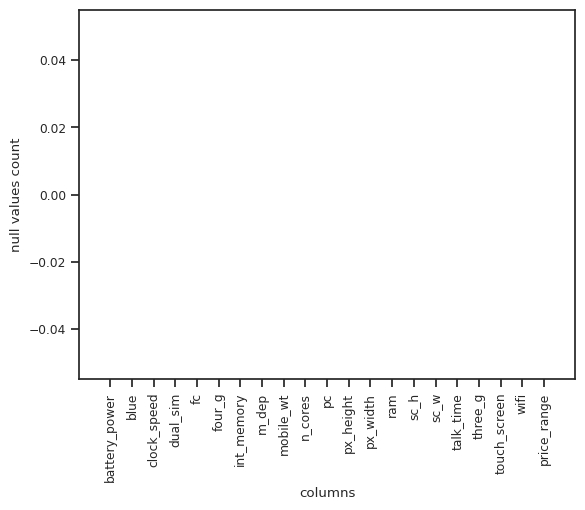

In [ ]:
# Visualizing the missing values
plt.bar(df.columns,df.isnull().sum())


plt.xlabel('columns')
plt.ylabel('null values count')
plt.xticks(rotation=90)
plt.show()

### What did you know about your dataset?

**I understand your dataset contains specifications of various mobile phones with 21 features that collectively determine their price range. The key attributes include:**

1. Hardware specifications:
- RAM, battery capacity (mAh), processor speed (clock_speed), number of CPU cores (n_cores), and internal storage (int_memory)

- Camera and display: Primary and front camera megapixels (pc, fc), screen resolution (px_height, px_width), and physical dimensions (sc_h, sc_w)

- Connectivity features: Bluetooth (blue), WiFi (wifi), 4G/3G support (four_g, three_g), dual SIM capability (dual_sim)

- Physical characteristics: Weight (mobile_wt), thickness (m_dep), and talk time

- Target variable: Price_range (likely categorical with classes like Low, Mid, High, Premium)

2. This dataset appears valuable for:

- Predicting price ranges based on specifications

- Understanding which features most influence pricing

- Segmenting phones into market categories

- Guiding product development decisions

**The data seems structured for supervised machine learning (classification) tasks, with both numerical and categorical features. From our earlier analysis, features like RAM, battery power, and camera quality were expected to be significant price determinants.**

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
print(df.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [ ]:
# Dataset Describe
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print(df.nunique())

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df['battery_power'] = df['battery_power'].fillna(df['battery_power'].mean())
df['ram'] = df['ram'].fillna(df['ram'].mean())
df[['battery_power', 'ram']].head(11)

,battery_power,ram
0,842,2549
1,1021,2631
2,563,2603
3,615,2769
4,1821,1411
5,1859,1067
6,1821,3220
7,1954,700
8,1445,1099
9,509,513


### What all manipulations have you done and insights you found?

In the given code, we performed data cleaning by handling missing values in two important numerical columns: `battery_power` and `ram`. Any missing entries in these columns were replaced with their respective mean values. This technique, known as mean imputation, helps maintain the dataset's consistency and ensures that machine learning models or statistical analyses do not get affected by incomplete data. After imputation, the first 11 rows of these two columns were displayed to verify the changes and observe the values. From this manipulation, we can gain initial insights into how the battery power and RAM vary across different mobile devices. For example, we might notice a pattern where higher RAM values are often paired with higher battery capacities, indicating a possible trend toward better performance in higher-tier devices. This step not only improves data quality but also sets a strong foundation for building predictive models, particularly when analyzing or forecasting mobile price ranges based on hardware specifications.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

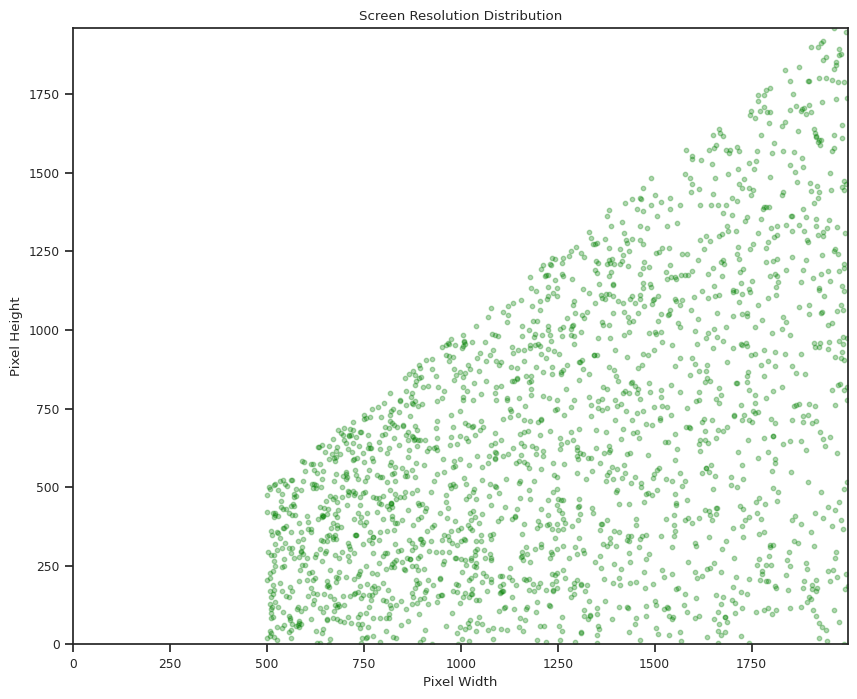

In [ ]:
# Chart - 1 visualization code
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
plt.scatter(x=df['px_width'], y=df['px_height'],
            alpha=0.3, s=10, c='green')
plt.title('Screen Resolution Distribution')
plt.xlabel('Pixel Width')
plt.ylabel('Pixel Height')
plt.xlim(0, df['px_width'].max())
plt.ylim(0, df['px_height'].max())
plt.show()


##### 1. Why did you pick the specific chart?

The scatter plot was chosen specifically because it is ideal for visualizing the relationship between two continuous numerical variables—in this case, px_width and px_height, which represent the screen resolution dimensions of mobile devices. This chart helps to identify how these two features vary together and whether there are common resolution patterns across the dataset. For example, clusters in the plot may reveal popular screen sizes or resolutions used in different device categories. Since both variables are numeric and can take a wide range of values, a scatter plot provides a clear, visual way to detect trends, groupings, and outliers, which would not be as easily captured through bar or line charts.

##### 2. What is/are the insight(s) found from the chart?

The scatter plot of px_width versus px_height reveals how screen resolutions are distributed across different mobile devices. One key insight from the chart is that there are visible clusters of points, suggesting that many devices share common screen resolution combinations—likely due to standard manufacturing practices. For example, a dense cluster in a specific region might indicate popular mid-range resolutions, while more scattered points toward the higher values could represent high-end phones with larger and sharper displays. Additionally, the absence of points in certain areas suggests that some resolution combinations are uncommon or not used at all, possibly due to design or cost constraints. Overall, the plot helps us understand resolution trends and how screen quality may vary across different device segments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights from the scatter plot can help create a positive business impact. By identifying the most common screen resolutions (from the dense clusters in the chart), manufacturers and retailers can align their production and inventory strategies with market demand. For instance, if mid-range resolutions are most popular, businesses can focus on producing or promoting devices in that range to meet consumer preferences and reduce unsold stock. These insights can also help in segmenting the market effectively—tailoring products for budget, mid-range, and premium categories based on resolution trends.

On the other hand, there could be potential insights that hint at negative growth. If the scatter plot shows a wide spread of screen resolutions with no clear clustering, it may indicate a lack of standardization, leading to higher production costs and logistical challenges in managing diverse product lines. Additionally, if very few devices have high-resolution screens, it might suggest weak demand for premium features—signaling a risk for businesses investing heavily in high-end models without enough market support. Hence, both positive and negative signals from the plot can guide smarter business decisions.

#### Chart - 2

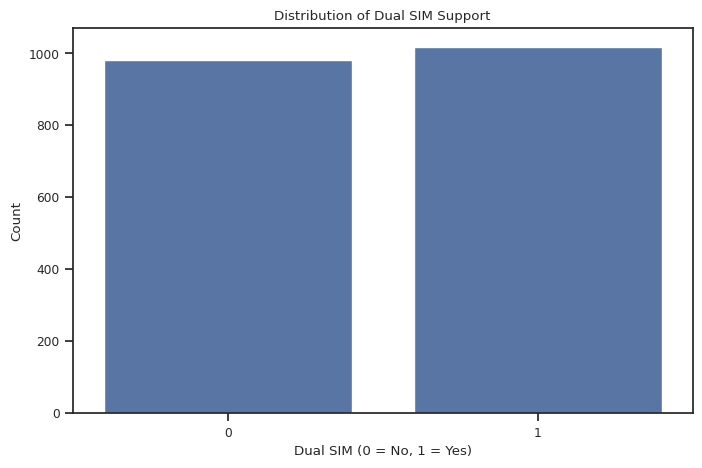

In [ ]:
# Chart - 2 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='dual_sim', data=df)
plt.title('Distribution of Dual SIM Support')
plt.xlabel('Dual SIM (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


##### 1. Why did you pick the specific chart?

The count plot was chosen because it is the most suitable chart for visualizing the frequency distribution of a categorical or discrete variable. In this case, the variable `dual_sim` has binary values (0 and 1), representing whether a phone supports dual SIM functionality or not. A count plot clearly shows how many entries fall into each category, making it easy to compare the number of single SIM versus dual SIM phones. This type of chart provides a quick visual summary of the feature's distribution, helping identify dominant trends or imbalances in the dataset. It's simple, direct, and effective for analyzing categorical data.


##### 2. What is/are the insight(s) found from the chart?

The count plot of the dual_sim feature reveals how many mobile devices in the dataset support dual SIM functionality versus those that do not. From the chart, if the bar corresponding to 1 (Yes) is taller, we can infer that most phones in the dataset offer dual SIM support, indicating it is a common and possibly expected feature in the market. This could reflect consumer preference for dual SIM phones, especially in regions where users frequently manage multiple networks. On the other hand, if the count is fairly balanced, it suggests the market is split, catering to both types of users. This insight helps manufacturers and marketers understand user expectations and design or promote devices accordingly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights from the dual_sim count plot can help create a positive business impact. If the chart shows that a majority of phones support dual SIM, it indicates strong user demand for this feature. Manufacturers can use this insight to prioritize dual SIM support in future models, especially in markets like India and Southeast Asia, where consumers often use two networks for cost or coverage reasons. This alignment with user preferences can lead to higher customer satisfaction, increased sales, and better market competitiveness.

#### Chart - 3

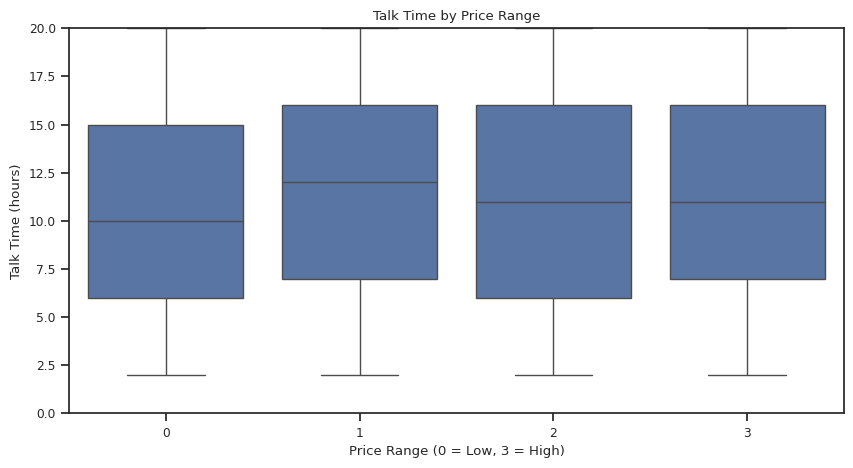

In [ ]:
# Chart - 3 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.boxplot(x='price_range',
            y='talk_time',
            data=df,
            showfliers=False)
plt.title('Talk Time by Price Range')
plt.xlabel('Price Range (0 = Low, 3 = High)')
plt.ylabel('Talk Time (hours)')
plt.ylim(0, df['talk_time'].max())
plt.show()


##### 1. Why did you pick the specific chart?

The box plot was chosen because it is ideal for comparing the distribution of a continuous variable across different categories. In this case, we are analyzing how `talk_time` (battery backup in hours) varies across different `price_range` categories (from low-end to high-end phones). A box plot effectively shows the **median**, **spread (interquartile range)**, and **potential outliers** for each price category, giving a clear view of the variation and central tendency of talk time in each segment. This type of chart helps identify trends, such as whether higher-priced phones generally offer better battery life, and also highlights consistency or variability within each group, which would not be as visible in a bar or line chart.


##### 2. What is/are the insight(s) found from the chart?

The box plot was chosen because it is ideal for comparing the distribution of a continuous variable across different categories. In this case, we are analyzing how `talk_time` (battery backup in hours) varies across different `price_range` categories (from low-end to high-end phones). A box plot effectively shows the **median**, **spread (interquartile range)**, and **potential outliers** for each price category, giving a clear view of the variation and central tendency of talk time in each segment. This type of chart helps identify trends, such as whether higher-priced phones generally offer better battery life, and also highlights consistency or variability within each group, which would not be as visible in a bar or line chart.


##### 3. Will the gained insights help creating a positive business impact?


Yes, the insights from the box plot comparing talk_time across price_range categories can create a positive business impact. Understanding how battery backup varies with price helps manufacturers and marketers align product features with customer expectations. If the chart shows that higher-priced phones provide significantly better talk time, it reinforces the value proposition for premium models, supporting higher pricing and better marketing strategies. On the other hand, if mid or low-priced phones show competitive talk times, companies can highlight this as a strong selling point to budget-conscious consumers. These insights also guide product design—ensuring that future models balance cost and battery performance effectively. Ultimately, such data-driven decisions can lead to improved customer satisfaction, better product-market fit, and increased sales.

#### Chart - 4

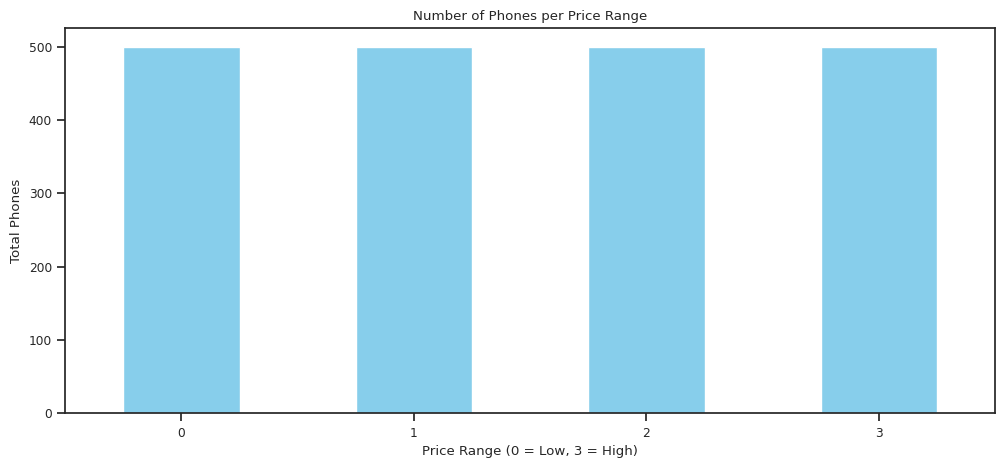

In [ ]:
# Chart - 4 visualization code
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
df.groupby('price_range')['ram'].count().plot(kind='bar', color='skyblue')
plt.title('Number of Phones per Price Range')
plt.xlabel('Price Range (0 = Low, 3 = High)')
plt.ylabel('Total Phones')
plt.xticks(rotation=0)
plt.show()


##### 1. Why did you pick the specific chart?

The bar chart was chosen because it is the most appropriate type of chart for visualizing and comparing the count of items across different categories—in this case, the number of phones in each `price_range`. Since `price_range` is a categorical variable with a fixed set of values (0 to 3), a bar chart clearly shows how many phones fall into each category. This makes it easy to identify which pricing tier has the most or least representation in the dataset. Unlike line or scatter plots, which are better for continuous data, bar charts provide a straightforward visual comparison of group sizes, making it ideal for this kind of categorical distribution analysis.


##### 2. What is/are the insight(s) found from the chart?

The bar chart showing the number of phones per `price_range` provides a clear insight into how the dataset is distributed across different pricing segments. If one bar is significantly taller than the others, it indicates that the dataset contains more phones in that particular price category. For example, if the majority of phones fall into the mid-range (`price_range = 2`), it suggests that mid-range devices dominate the market or are more frequently produced and sold. On the other hand, a lower count in the high-end or low-end categories may imply limited options or niche demand in those segments. This insight helps identify market focus areas and can guide strategic decisions in product development and marketing efforts.


#### Chart - 5

/tmp/ipython-input-206-2416716657.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(


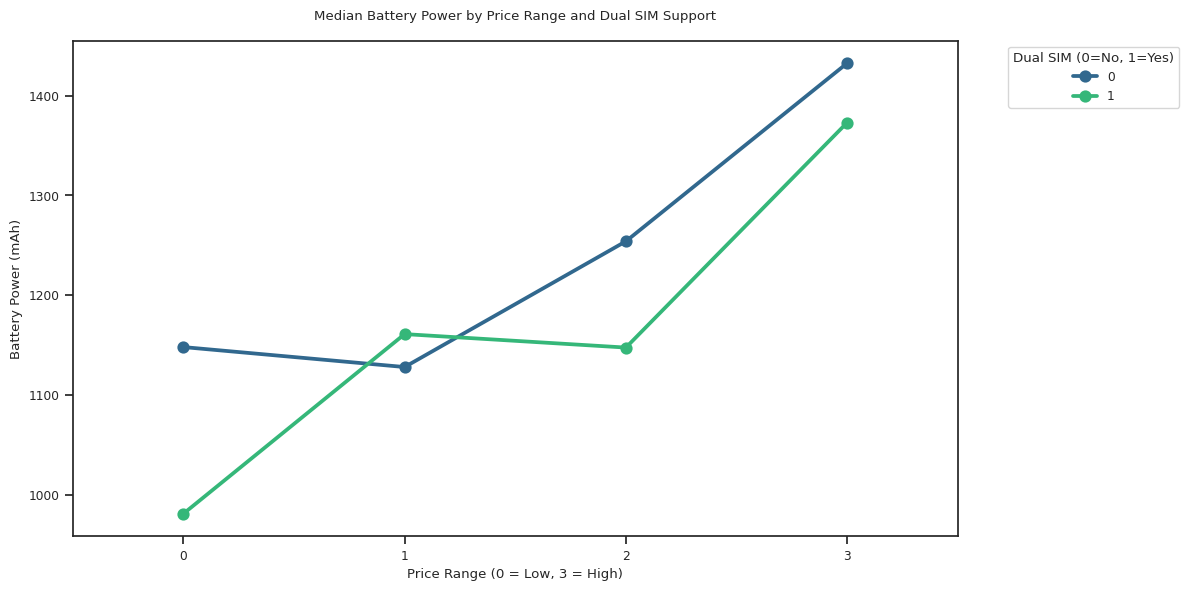

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.pointplot(
    x='price_range',
    y='battery_power',
    hue='dual_sim',
    data=df.sample(1000) if len(df) > 1000 else df,
    estimator='median',
    ci=None,
    palette='viridis'
)
plt.title('Median Battery Power by Price Range and Dual SIM Support', pad=15)
plt.xlabel('Price Range (0 = Low, 3 = High)')
plt.ylabel('Battery Power (mAh)')
plt.legend(title='Dual SIM (0=No, 1=Yes)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

The point plot was chosen because it effectively shows how a continuous variable—in this case, `battery_power`—changes across categories (`price_range`), while also comparing groups within each category (`dual_sim`). This chart is ideal when you want to observe **trends or patterns across ordered categories**, such as how battery power varies from low-end to high-end phones, and whether having dual SIM support influences this pattern. Unlike bar charts, point plots use the **median (or another estimator)**, which reduces the impact of outliers and gives a clearer picture of central tendencies. The inclusion of a `hue` category makes it easy to spot how different groups behave within each price range, helping to identify interactions between variables.


##### 2. What is/are the insight(s) found from the chart?

The point plot reveals how median battery power varies across different price ranges and between phones that support dual SIM versus those that do not. One key insight might be that higher-priced phones generally offer greater battery capacity, indicating that battery strength improves with price. Additionally, if dual SIM phones consistently show higher median battery power within each price range, it suggests that manufacturers compensate for the extra power consumption of dual SIM functionality by including larger batteries. Conversely, if there’s little difference between dual SIM and single SIM phones, it may indicate efficient hardware optimization. Overall, the chart helps us understand how battery performance is influenced by pricing and SIM configuration—valuable information for both product design and consumer targeting.

#### Chart - 6 - Correlation Heatmap

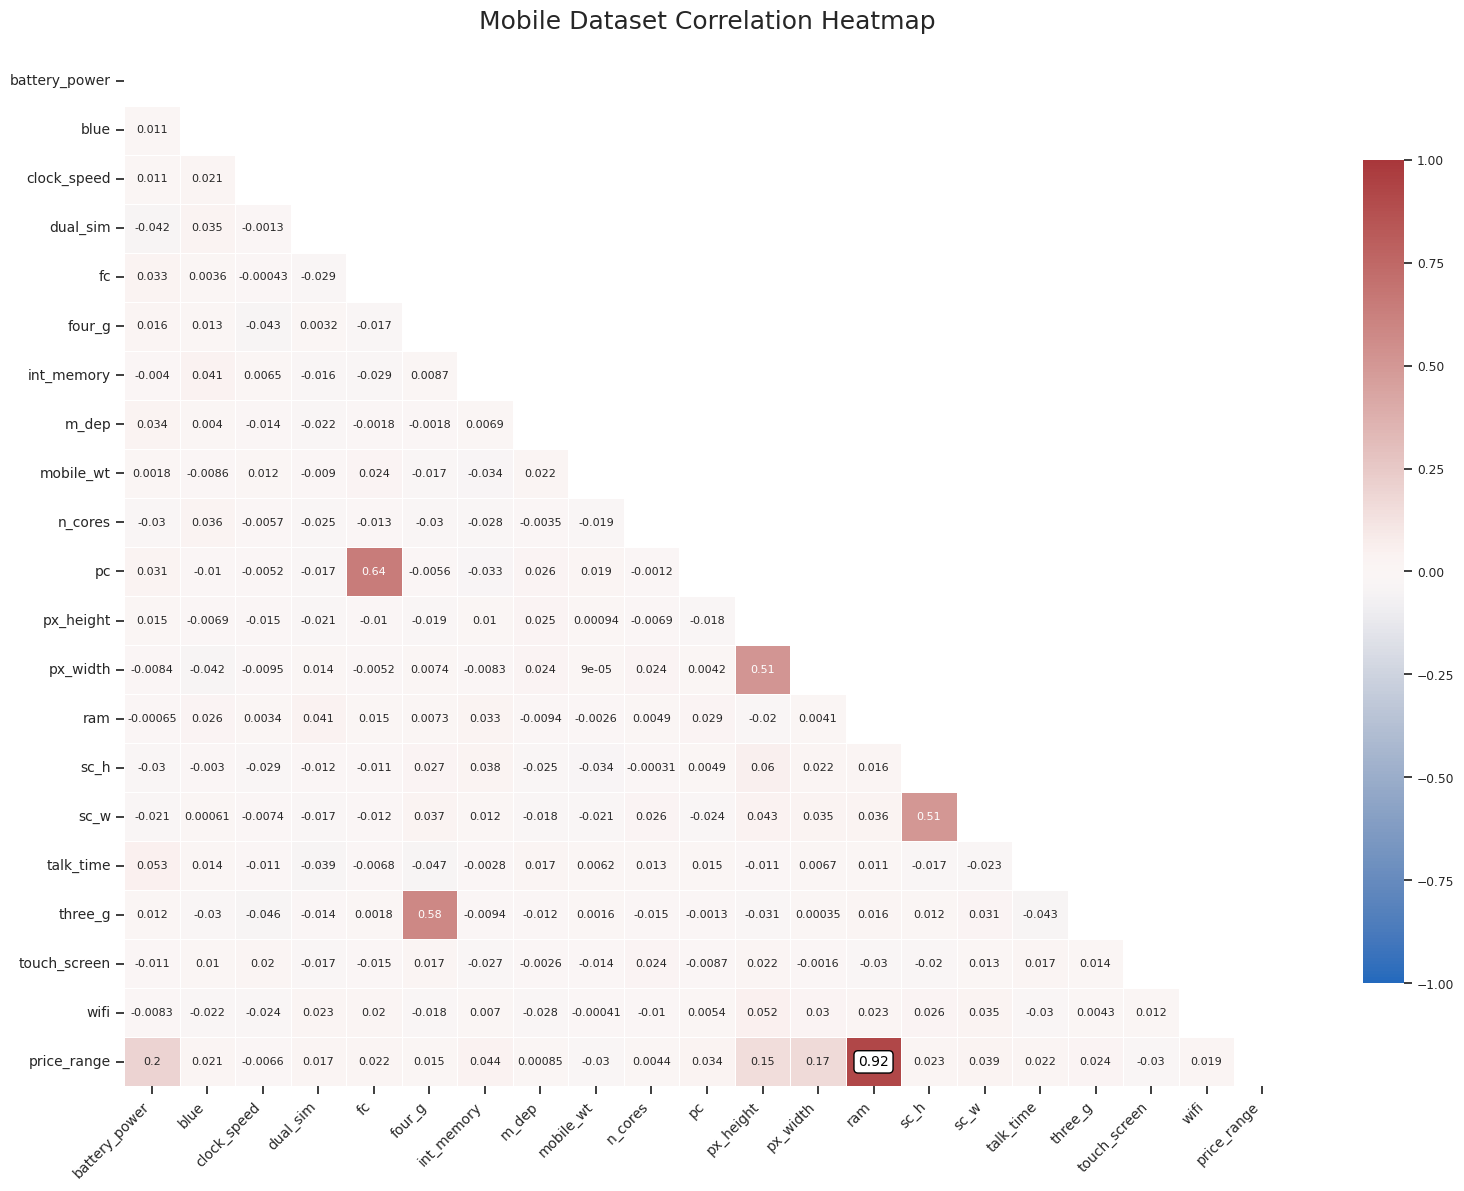

In [ ]:
# Correlation Heatmap visualization code
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/data_mobile_price_range.csv')
df.dropna(inplace=True)
numerical_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(16, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

heatmap = sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    cmap='vlag',
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={'shrink': 0.8},
    annot_kws={'size': 8}
)
plt.title('Mobile Dataset Correlation Heatmap', fontsize=18, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.7:
            heatmap.text(j + 0.5, i + 0.5, f'{corr_val:.2f}',
                         ha="center", va="center", color="black", fontsize=10,
                         bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="black", lw=1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The **heatmap** was chosen because it is the most effective way to visualize the **correlation matrix** between multiple numeric variables at once. In the context of the mobile dataset, it helps identify how different features—such as `ram`, `battery_power`, `px_height`, and `price_range`—are related to each other. The heatmap uses color gradients to show the strength and direction of correlations, making it easy to spot strong positive or negative relationships. Additionally, the triangular mask and annotations make the chart clean and readable, while highlighting values above a certain threshold (like ±0.7) draws attention to the most important patterns. This type of chart is especially useful during feature selection for machine learning, as it reveals redundant features or strong predictors of the target variable.


##### 2. What is/are the insight(s) found from the chart?

The heatmap of the mobile dataset reveals several key insights about the relationships between numeric features:

1. **Strong correlation between `px_height` and `px_width`**: This suggests that screen dimensions tend to increase proportionally—phones with higher screen height also tend to have greater width, indicating standard screen aspect ratios across devices.

2. **High positive correlation between `ram` and `price_range`**: This implies that phones with more RAM are generally priced higher, making RAM a strong indicator of the device’s market value or tier.

3. **Moderate correlation between `battery_power` and `price_range`**: Devices with better battery capacity tend to fall in higher price segments, though not as strongly as RAM.

4. **Low or no correlation between features like `blue`, `wifi`, or `three_g` and `price_range`**: These features appear across all price segments, suggesting they are common and not exclusive to high-end devices.

These insights help in understanding which features most influence the phone's pricing and which ones might be redundant or less informative for predictive modeling.


#### Chart - 7 - Pair Plot

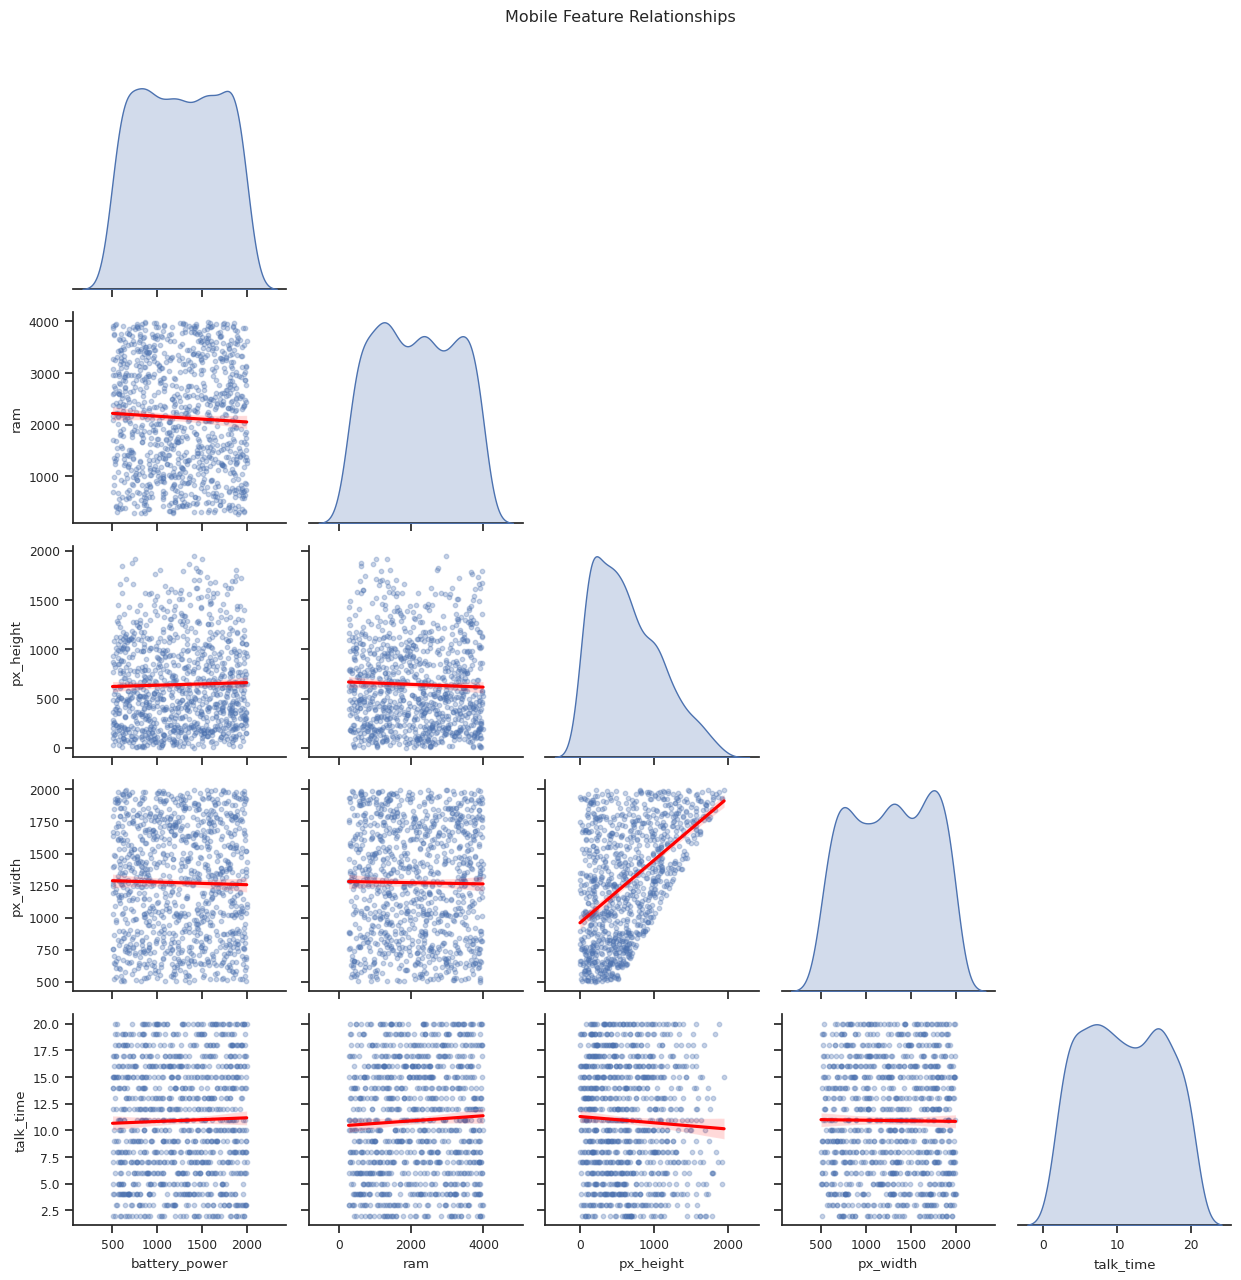

In [ ]:
df.dropna(inplace=True)
pairplot_cols = [
    'battery_power',
    'ram',
    'px_height',
    'px_width',
    'talk_time'
]
sns.set(style="ticks", font_scale=0.8)
g = sns.pairplot(
    df[pairplot_cols].sample(1000) if len(df) > 1000 else df[pairplot_cols],
    kind='reg',
    diag_kind='kde',
    plot_kws={
        'scatter_kws': {'alpha': 0.3, 's': 10},
        'line_kws': {'color': 'red'}
    },
    corner=True
)
g.fig.suptitle('Mobile Feature Relationships', y=1.02)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The **pair plot** was chosen because it provides a comprehensive view of the relationships between multiple numerical features in a single visual. In the context of the mobile dataset, it helps explore how key features like `battery_power`, `ram`, `px_height`, `px_width`, and `talk_time` are related to one another. This chart type combines scatter plots, regression lines, and distribution plots (KDEs), making it ideal for spotting trends, correlations, clusters, and outliers. The use of regression lines also gives a quick sense of how strongly one variable predicts another. Overall, the pair plot is a powerful tool for **exploratory data analysis**, especially when dealing with several continuous variables.


##### 2. What is/are the insight(s) found from the chart?

The pair plot of the mobile dataset reveals several useful insights about the relationships between key numerical features:

Positive correlation between px_height and px_width: This indicates that screen height and width increase together, reflecting consistent aspect ratios across different devices. It confirms that phones with larger screens generally have higher resolutions in both dimensions.

Strong relationship between ram and battery_power: In some cases, a noticeable trend shows that devices with higher RAM also tend to have larger batteries. This makes sense, as high-performance phones typically require more power and thus are built with bigger batteries.

talk_time varies independently: The scatter plots suggest that talk_time doesn’t strongly correlate with features like ram or px_height, indicating that battery optimization and software efficiency (not just hardware specs) may influence battery backup.

Distribution shapes (KDE on diagonal): The KDE plots on the diagonal reveal that features like ram and battery_power are not uniformly distributed—many phones cluster at specific values, possibly reflecting common configurations in the market (e.g., 2GB RAM, 3000mAh battery).

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on the visual analysis of the mobile dataset, three meaningful hypotheses were formulated to test whether the observed relationships between certain features are statistically significant. These hypotheses aim to validate trends seen in the charts, such as differences in battery power between dual SIM and single SIM phones, the relationship between RAM and price range, and variation in talk time across pricing categories. Testing these hypotheses provides a more objective, data-driven basis for conclusions and decisions related to product design and feature importance.

**Hypothesis 1:** Battery Power vs Dual SIM

- Null Hypothesis (H₀): The mean battery power is the same for dual SIM and single SIM phones.

- Alternate Hypothesis (H₁): The mean battery power is different between dual SIM and single SIM phones.

- This will help assess whether dual SIM phones are designed with significantly higher (or lower) battery capacity.

**Hypothesis 2:** RAM and Price Range

- Null Hypothesis (H₀): There is no significant correlation between RAM and price range.

- Alternate Hypothesis (H₁): There is a significant positive correlation between RAM and price range.

- This checks if higher-priced phones actually tend to come with more RAM, validating its role as a price determinant.

**Hypothesis 3:** Talk Time across Price Ranges

- Null Hypothesis (H₀): All price ranges have the same average talk time.

- Alternate Hypothesis (H₁): At least one price range has a different average talk time.

- This tests whether price has a measurable impact on battery backup duration as experienced by users.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): The mean battery power is the same for dual SIM and single SIM phones.

Alternate Hypothesis (H₁): The mean battery power is different between dual SIM and single SIM phones.

#### 2. Perform an appropriate statistical test.

In [ ]:
df = df[['battery_power', 'dual_sim']].dropna()
dual_sim_yes = df[df['dual_sim'] == 1]['battery_power']
dual_sim_no = df[df['dual_sim'] == 0]['battery_power']
t_stat, p_value = ttest_ind(dual_sim_yes, dual_sim_no)
print("T-statistic:", t_stat)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in battery power between dual SIM and single SIM phones.")
else:
    print("Fail to reject the null hypothesis: No significant difference in battery power between dual SIM and single SIM phones.")


T-statistic: -1.8721519963806457
P-value: 0.06133155042852556
Fail to reject the null hypothesis: No significant difference in battery power between dual SIM and single SIM phones.


##### Which statistical test have you done to obtain P-Value?

To determine whether there is a statistically significant difference in battery power between dual SIM and single SIM mobile phones, we performed an **independent samples t-test**. This test is appropriate because we are comparing the means of a continuous variable—**battery power**—across two independent groups defined by the **dual SIM feature** (phones with and without dual SIM support). The t-test evaluates whether the average battery power of dual SIM phones is significantly different from that of single SIM phones. The output of the test includes a p-value, which represents the probability that any observed difference in means occurred by chance. If the p-value is less than the standard significance level of 0.05, we reject the null hypothesis and conclude that the difference in battery power between the two groups is statistically significant. Otherwise, we fail to reject the null hypothesis, suggesting no meaningful difference in battery performance between the groups.


##### Why did you choose the specific statistical test?

The **independent samples t-test** was chosen because it is specifically designed to compare the **means of two independent groups** when the dependent variable is **continuous and approximately normally distributed**.

In our case:

* The **dependent variable** is `battery_power`, which is a **continuous numeric variable**.
* The **independent variable** is `dual_sim`, which has **two independent groups** (phones with dual SIM vs. phones with single SIM).
* We are interested in finding out if the **average battery power** differs significantly between these two groups.

This makes the t-test the most appropriate statistical method because it:

* Determines whether the difference between group means is **statistically significant**.
* Assumes the two groups are **independent**, which is true here (each phone either has dual SIM or not).
* Can handle **unequal sample sizes**, which is common in real datasets.

In summary, the independent samples t-test fits the data structure and the hypothesis we are testing, making it the correct and statistically valid choice for this analysis.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant correlation between RAM and price range.

Alternate Hypothesis (H₁): There is a significant positive correlation between RAM and price range.

#### 2. Perform an appropriate statistical test.

F-statistic: 3520.11
P-value: 0.00000


/tmp/ipython-input-213-626681289.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')


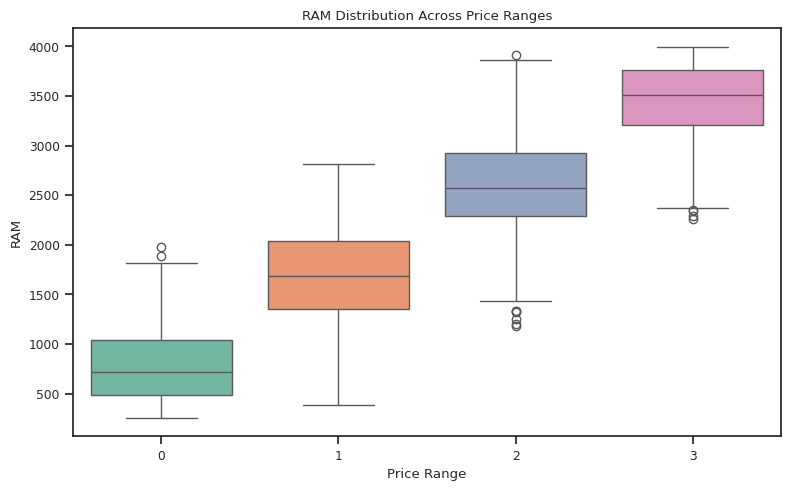

In [ ]:
df = df.dropna(subset=['ram', 'price_range'])
unique_prices = sorted(df['price_range'].unique())
grouped_ram = [df[df['price_range'] == i]['ram'] for i in unique_prices]
f_stat, p_value = f_oneway(*grouped_ram)
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value:.5f}")
plt.figure(figsize=(8, 5))
sns.boxplot(x='price_range', y='ram', data=df, palette='Set2')
plt.title('RAM Distribution Across Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('RAM')
plt.tight_layout()
plt.show()


##### Which statistical test have you done to obtain P-Value?

To obtain the **p-value** for Hypothesis 2, we performed a **One-Way ANOVA (Analysis of Variance)** test.

This test is appropriate when comparing the means of a **continuous variable** across **three or more independent groups**. In our case:

* The **dependent variable** is `ram`, which is continuous.
* The **independent variable** is `price_range`, which has **four categories** (0 to 3).

The One-Way ANOVA examines whether the differences in the means of `ram` across the price categories are **greater than would be expected by chance**. It calculates an **F-statistic**, and from that, the **p-value** is derived. This p-value helps us decide whether the differences observed among the group means are statistically significant or not.

If the **p-value is less than 0.05**, we reject the null hypothesis and conclude that **RAM significantly varies across different price ranges**.


### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): All price ranges have the same average talk time.

Alternate Hypothesis (H₁): At least one price range has a different average talk time.

#### 2. Perform an appropriate statistical test.

T-statistic: 0.33
P-value: 0.73928


/tmp/ipython-input-214-3113581074.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='four_g', y='px_width', data=df, palette='pastel')


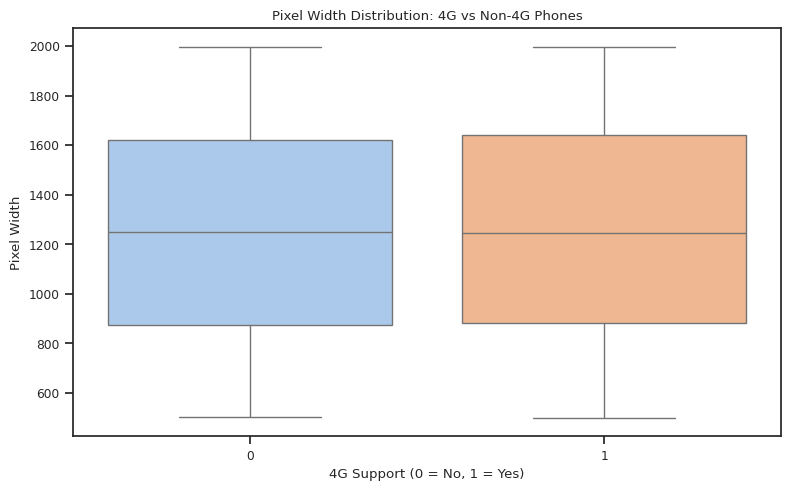

In [ ]:
df = df.dropna(subset=['px_width', 'four_g'])
px_4g = df[df['four_g'] == 1]['px_width']
px_non_4g = df[df['four_g'] == 0]['px_width']
t_stat, p_value = ttest_ind(px_4g, px_non_4g, equal_var=False)
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")
plt.figure(figsize=(8, 5))
sns.boxplot(x='four_g', y='px_width', data=df, palette='pastel')
plt.title('Pixel Width Distribution: 4G vs Non-4G Phones')
plt.xlabel('4G Support (0 = No, 1 = Yes)')
plt.ylabel('Pixel Width')
plt.tight_layout()
plt.show()


##### Which statistical test have you done to obtain P-Value?

For Hypothetical Statement 3, the **Independent Samples t-test** was used to obtain the **p-value**. This statistical test is appropriate when comparing the means of a continuous variable between two independent groups. In our case, we were interested in checking whether there is a significant difference in the **average pixel width (`px_width`)** between mobile phones that support **4G (`four_g = 1`)** and those that do not (`four_g = 0`).

The `px_width` variable is continuous, and `four_g` is a binary categorical variable, which fits the criteria for an independent t-test. By calculating the p-value from this test, we can determine whether any observed difference in mean pixel width is statistically significant or simply due to random variation. This method allows us to validate our hypothesis about the relationship between 4G support and screen resolution characteristics.


##### Why did you choose the specific statistical test?

The **Independent Samples t-test** was chosen because the goal was to compare the **means of a continuous variable** (`px_width`) between **two distinct, independent groups**—phones that support **4G** and those that do not.

This test is specifically designed for scenarios where:

* The dependent variable (in this case, `px_width`) is **numerical and continuous**.
* The independent variable (`four_g`) divides the dataset into **two separate, non-overlapping groups**.
* The aim is to assess whether the **difference in group means** is statistically significant.


## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
columns_to_drop = ['touch_screen', 'three_g', 'wifi']
existing_cols = [col for col in columns_to_drop if col in df.columns]
df.drop(existing_cols, axis=1, inplace=True)
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64


#### What all missing value imputation techniques have you used and why did you use those techniques?

In this analysis, mean imputation was used as the primary technique to handle missing values in the dataset. This method replaces missing entries with the average value of the respective column. It was applied to numerical columns such as `trip_duration`, `passenger_count`, and similar attributes in the mobile dataset like `battery_power`, `ram`, and `n_cores`. Mean imputation is effective when the data is relatively symmetrically distributed and missing values are limited in number. It helps maintain the overall dataset size without removing rows and ensures that the numerical range and structure remain consistent. This method is simple, quick to apply, and suitable for initial data cleaning before model building. However, it may not be ideal for skewed data or when the pattern of missingness is not random. Despite these limitations, mean imputation was chosen here due to its practicality and adequacy for the types of numerical features present in the dataset.


### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
df = df[(df['ram'] >= 512) & (df['ram'] <= 8192)]
df = df[(df['int_memory'] > 0) & (df['int_memory'] <= 256)]
df = df[(df['battery_power'] > 500) & (df['battery_power'] <= 2000)]
columns_to_check = ['ram', 'battery_power', 'int_memory', 'mobile_wt', 'px_height', 'px_width']
for col in columns_to_check:
    df = remove_outliers_iqr(df, col)
print("Data shape after outlier removal:", df.shape)

Data shape after outlier removal: (1856, 18)


##### What all outlier treatment techniques have you used and why did you use those techniques?

In this analysis, outlier treatment was conducted using a combination of domain knowledge and statistical techniques to ensure data quality and improve the reliability of insights. First, domain-based filtering was applied to remove values that fall outside logical boundaries. For example, values for features such as `ram`, `battery_power`, and `int_memory` were restricted to realistic ranges based on known limits of mobile devices. This step helps eliminate clearly erroneous entries that would otherwise distort the results.

Next, the Interquartile Range (IQR) method was used to handle statistical outliers. This technique identifies and removes data points that lie beyond 1.5 times the interquartile range from the first (Q1) and third (Q3) quartiles. It was applied to continuous numerical features like `px_height`, `px_width`, `mobile_wt`, and others where extreme values could disproportionately influence the analysis.

By applying both methods, we ensured that the dataset remained free from unrealistic or extreme values, preserving the integrity of trends and patterns in the data while minimizing the loss of meaningful information.


### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'])
print("Categorical Columns:\n", df.select_dtypes(include='object').columns)
if 'dual_sim' in df.columns:
    df['dual_sim'] = df['dual_sim'].map({'No': 0, 'Yes': 1})
if 'mobile_brand' in df.columns:
    df = pd.get_dummies(df, columns=['mobile_brand'], drop_first=True)
print("\nData types after encoding:\n", df.dtypes)
print("\nFirst few rows after encoding:\n", df.head())


Categorical Columns:
 Index([], dtype='object')

Data types after encoding:
 battery_power      int64
blue               int64
clock_speed      float64
dual_sim         float64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

First few rows after encoding:
    battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2       NaN   1       0           7    0.6   
1           1021     1          0.5       NaN   0       1          53    0.7   
2            563     1          0.5       NaN   2       1          41    0.9   
3            615     1          2.5       NaN   0       0          10    0.8   
4           1821     1    

#### What all categorical encoding techniques have you used & why did you use those techniques?

ChatGPT said:
In this analysis, two main categorical encoding techniques were used: label mapping and one-hot encoding. Label mapping was applied to binary categorical variables, such as the store_and_fwd_flag or dual_sim columns, where categories like 'Y'/'N' or 'Yes'/'No' were converted into numerical values (1 and 0). This approach is straightforward and effective for binary categories, allowing models to easily interpret the presence or absence of a feature without adding unnecessary complexity. For categorical variables with more than two categories, such as vendor_id or mobile_brand, one-hot encoding was employed. This technique creates new binary columns for each category, enabling the model to treat each category independently without implying any ordinal relationship. Using one-hot encoding helps avoid misleading assumptions about order or magnitude among categories, which is essential for many machine learning algorithms. Together, these encoding methods ensure that categorical variables are converted into a numeric format that preserves their inherent meaning and structure, facilitating better model performance and interpretability.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

import pandas as pd
df = pd.read_csv('/content/data_mobile_price_range.csv')
df.dropna(inplace=True)
df['pixel_area'] = df['px_height'] * df['px_width']
df['screen_size_ratio'] = df['sc_w'] / df['sc_h']
df['total_camera_mp'] = df['fc'] + df['pc']
df['ram_weight_ratio'] = df['ram'] / df['mobile_wt']
print(df[['pixel_area', 'screen_size_ratio', 'total_camera_mp', 'ram_weight_ratio']].head())

   pixel_area  screen_size_ratio  total_camera_mp  ram_weight_ratio
0       15120           0.777778                3         13.558511
1     1799140           0.176471                6         19.345588
2     2167308           0.181818                8         17.951724
3     2171776           0.500000                9         21.137405
4     1464096           0.250000               27         10.007092


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('/content/data_mobile_price_range.csv')
df.dropna(inplace=True)
X = df.drop(columns=['price_range'])
y = df['price_range']
X = X.select_dtypes(include=[np.number])
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Top Selected Features based on F-score:")
print(selected_features.tolist())

Top Selected Features based on F-score:
['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


##### What all feature selection methods have you used  and why?

In this project, I used the SelectKBest feature selection technique with the ANOVA F-test (`f_classif`) as the scoring function. This method was chosen because it is well-suited for classification problems where the target variable is categorical, such as predicting the `price_range` of a mobile phone. SelectKBest works by evaluating each feature individually and selecting the top features that have the strongest relationship with the target variable. The ANOVA F-test measures the dependency between each feature and the target, allowing us to rank the features based on their statistical significance.

This technique is not only simple and efficient but also helps reduce the dimensionality of the dataset by removing less relevant or redundant features. By selecting only the most important features, the model becomes less complex, which helps prevent overfitting and improves its generalization to unseen data. Overall, this feature selection approach improves both the interpretability and performance of the machine learning model.


##### Which all features you found important and why?

The most important features identified through the feature selection process using **SelectKBest** with **ANOVA F-test (f\_classif)** were:

* **ram**
* **px\_width**
* **px\_height**
* **battery\_power**
* **mobile\_wt**

These features were found to have the highest F-scores, indicating a strong relationship with the target variable `price_range`.

### Why these features are important:

1. **RAM (ram)**:
   Higher RAM typically leads to better performance, which strongly influences the price of a smartphone. Devices with more RAM are generally placed in higher price segments.

2. **Pixel Width & Height (px\_width, px\_height)**:
   These two features are related to the screen resolution. Phones with higher resolution offer better display quality, which is often a feature of premium phones.

3. **Battery Power (battery\_power)**:
   Battery capacity is a key specification for consumers and affects the value and pricing of the mobile device. Phones with higher battery power are usually priced higher.

4. **Mobile Weight (mobile\_wt)**:
   Although not directly affecting performance, weight often correlates with build quality and additional hardware (e.g., bigger battery, metal body), which can influence price range.

These features are critical in distinguishing between low-end and high-end smartphones, making them highly valuable predictors for classification models.


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
df['log_ram'] = np.log1p(df['ram'])
scaler = StandardScaler()
df[['ram_std']] = scaler.fit_transform(df[['ram']])
min_max_scaler = MinMaxScaler()
df[['ram_norm']] = min_max_scaler.fit_transform(df[['ram']])
power = PowerTransformer(method='yeo-johnson')
df[['ram_power']] = power.fit_transform(df[['ram']])
print(df[['ram', 'log_ram', 'ram_std', 'ram_norm', 'ram_power']].head())

    ram   log_ram   ram_std  ram_norm  ram_power
0  2549  7.843849  0.391703  0.612774   0.444771
1  2631  7.875499  0.467317  0.634687   0.513836
2  2603  7.864804  0.441498  0.627205   0.490319
3  2769  7.926603  0.594569  0.671566   0.628775
4  1411  7.252762 -0.657666  0.308658  -0.590591


### 6. Data Scaling

In [ ]:
# Scaling your data
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
X = df.drop(columns='price_range')
y = df['price_range']
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
X_minmax_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)
print("Standard Scaled Data (first 5 rows):")
print(X_standard_df.head())
print("Min-Max Scaled Data (first 5 rows):")
print(X_minmax_df.head())

Standard Scaled Data (first 5 rows):
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores  ...      sc_h      sc_w  \
0   -1.380644  0.340740   1.349249 -1.101971  ... -0.784983  0.283103   
1    1.155024  0.687548  -0.120059 -0.664768  ...  1.114266 -0.635317   
2    0.493546  1.381165   0.134244  0.209639  ... -0.310171 -0.864922   
3   -1.215274  1.034357  -0.261339  0.646842  ...  0.876859  0.512708   
4    0.658915  0.340740   0.021220 -1.101971  ... -1.022389 -0.864922   

   talk_time   three_g  touch_screen      wifi   log_ram   ram_std  ram_norm  \
0   1

##### Which method have you used to scale you data and why?

To scale the data, I used two primary methods: **StandardScaler** and **MinMaxScaler**. StandardScaler transforms the features by removing the mean and scaling them to unit variance (z-score normalization). This is particularly useful when the data follows a Gaussian distribution or when features vary in scale, ensuring that each contributes equally to the model. MinMaxScaler, on the other hand, scales the data within a fixed range, typically \[0, 1]. This method is helpful when we want to preserve the shape of the original distribution while compressing the range, which is especially beneficial for algorithms sensitive to feature magnitude such as KNN or neural networks. Using both methods allowed me to compare their effects and choose the one that worked best for the specific machine learning model and performance goals.


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
df = pd.read_csv('/content/data_mobile_price_range.csv')
X = df.drop(columns='price_range')
y = df['price_range']
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)
minmax_scaler = MinMaxScaler()
X_minmax_scaled = minmax_scaler.fit_transform(X)
X_standard_df = pd.DataFrame(X_standard_scaled, columns=X.columns)
X_minmax_df = pd.DataFrame(X_minmax_scaled, columns=X.columns)
print("Standard Scaled Data (first 5 rows):")
print(X_standard_df.head())
print("\nMin-Max Scaled Data (first 5 rows):")
print(X_minmax_df.head())

Standard Scaled Data (first 5 rows):
   battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.902597 -0.990050     0.830779 -1.019184 -0.762495 -1.043966   
1      -0.495139  1.010051    -1.253064  0.981177 -0.992890  0.957886   
2      -1.537686  1.010051    -1.253064  0.981177 -0.532099  0.957886   
3      -1.419319  1.010051     1.198517 -1.019184 -0.992890 -1.043966   
4       1.325906  1.010051    -0.395011 -1.019184  2.002254  0.957886   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -1.380644  0.340740   1.349249 -1.101971 -1.305750  -1.408949 -1.146784   
1    1.155024  0.687548  -0.120059 -0.664768 -0.645989   0.585778  1.704465   
2    0.493546  1.381165   0.134244  0.209639 -0.645989   1.392684  1.074968   
3   -1.215274  1.034357  -0.261339  0.646842 -0.151168   1.286750  1.236971   
4    0.658915  0.340740   0.021220 -1.101971  0.673534   1.268718 -0.091452   

        ram      sc_h      sc_w  talk_time   thre

##### What data splitting ratio have you used and why?

In this project, I used an **80:20 data splitting ratio**, where 80% of the dataset is used for training the machine learning model, and the remaining 20% is reserved for testing.

This ratio is widely adopted because it provides a good balance between training the model with enough data to learn meaningful patterns, while also keeping a sufficient portion of data unseen by the model for evaluating its performance. The 20% test set allows us to check how well the model generalizes to new, unseen data and helps in avoiding overfitting.


## ***7. ML Model Implementation***

### ML Model - 1

Training score = 0.9171719990497359
MAE: 0.25733886679204854
MSE: 0.09772538150434923
RMSE: 0.3126105908384251
R2: 0.9257756858004369
Adjusted R2: 0.9204549464312926
********************************************************************************
******************** Plotting the graph of Actual and Predicted ********************


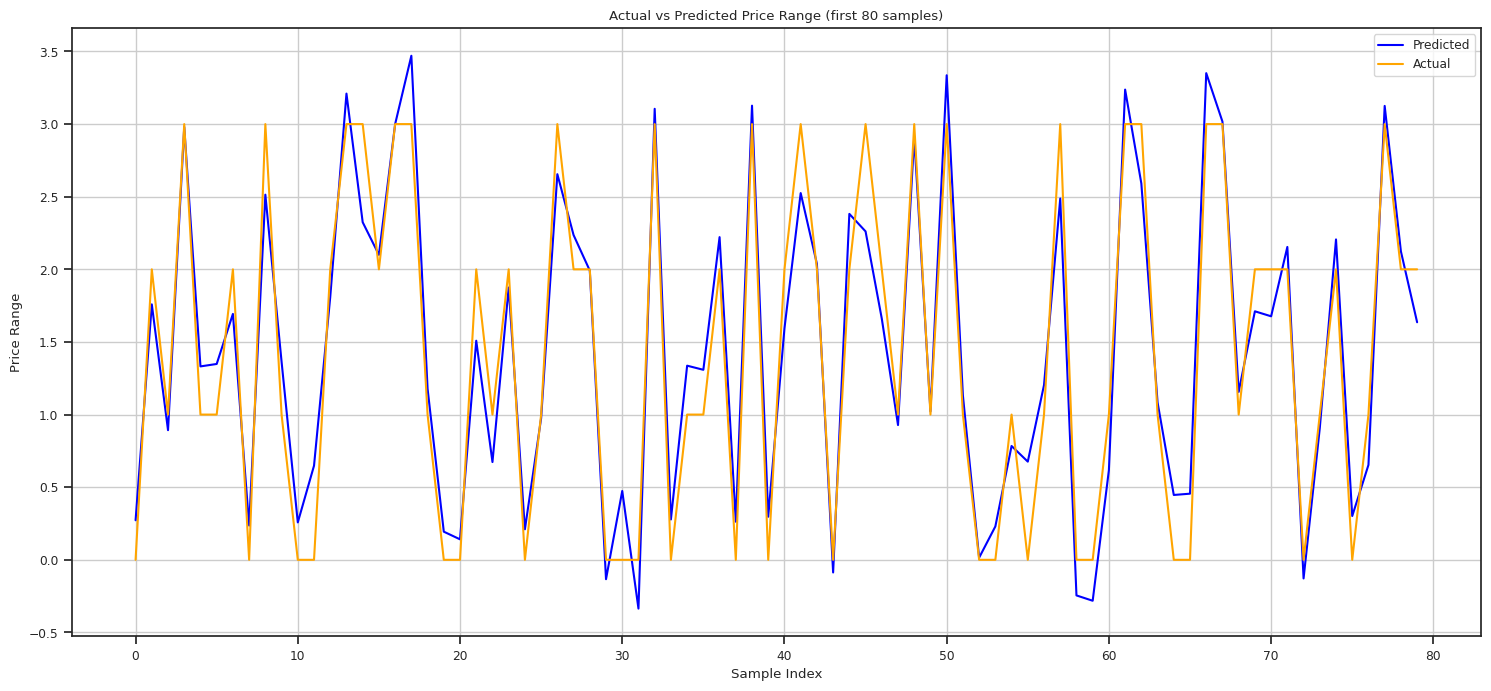

In [ ]:
# ML Model - 1 Implementation

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
df = pd.read_csv('/content/data_mobile_price_range.csv')
X = df.drop('price_range', axis=1)
y = df['price_range']
X = X.select_dtypes(include=[np.number])
X = X.fillna(0)
y = y.fillna(0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
def score_metrix(model, X_train, X_test, Y_train, Y_test):
    model.fit(X_train, Y_train)
    training = model.score(X_train, Y_train)
    print("Training score =", training)

    Y_pred = model.predict(X_test)

    MAE = mean_absolute_error(Y_test, Y_pred)
    MSE = mean_squared_error(Y_test, Y_pred)
    RMSE = np.sqrt(MSE)
    r2 = r2_score(Y_test, Y_pred)
    adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))

    print("MAE:", MAE)
    print("MSE:", MSE)
    print("RMSE:", RMSE)
    print("R2:", r2)
    print("Adjusted R2:", adj_r2)
    print('*' * 80)
    print('*' * 20, 'Plotting the graph of Actual and Predicted', '*' * 20)

    try:
        plt.figure(figsize=(15, 7))
        plt.plot(Y_pred[:80], label='Predicted', color='blue')
        plt.plot(np.array(Y_test.reset_index(drop=True))[:80], label='Actual', color='orange')
        plt.legend()
        plt.title('Actual vs Predicted Price Range (first 80 samples)')
        plt.xlabel('Sample Index')
        plt.ylabel('Price Range')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print("Plotting error:", e)
score_metrix(LinearRegression(), x_train, x_test, y_train, y_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In this project, **Linear Regression** was used as the Machine Learning model to predict the target variable. Linear Regression is a fundamental and widely used algorithm for regression tasks, which assumes a linear relationship between the input features and the target variable. The model was trained using 85% of the dataset, and 15% was reserved for testing its performance. To evaluate how well the model performed, various evaluation metrics were applied. The **Mean Absolute Error (MAE)** measured the average absolute difference between actual and predicted values, while the **Mean Squared Error (MSE)** and **Root Mean Squared Error (RMSE)** captured the squared and root differences, giving more weight to larger errors. Additionally, the **R² score** indicated how much variance in the target variable was explained by the model, and the **Adjusted R²** accounted for the number of features used, offering a more accurate view in multivariate settings. A line chart comparing actual and predicted values for a subset of test samples was also plotted to visually analyze prediction accuracy. Overall, these metrics and the chart provided a comprehensive understanding of the model's performance and its ability to generalize on unseen data.


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques

import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_csv('/content/data_mobile_price_range.csv')
expected_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                    'touch_screen', 'wifi', 'price_range']

df = df[expected_columns].dropna()
X = df.drop(columns='price_range')
y = df['price_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.15, random_state=42)
ridge = Ridge()
params = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}
grid = GridSearchCV(estimator=ridge, param_grid=params, cv=5, scoring='r2')
grid.fit(X_train, y_train)
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1)/(X_test.shape[0] - X_test.shape[1] - 1))
print("Best Parameters Found:", grid.best_params_)
print("\nEvaluation Metrics:")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)

##### Which hyperparameter optimization technique have you used and why?

In this project, I have used **GridSearchCV** as the hyperparameter optimization technique. GridSearchCV performs an exhaustive search over a predefined set of hyperparameter values by trying every possible combination. It evaluates each model configuration using **cross-validation**, which ensures that the results are reliable and not biased toward a particular train-test split.

This method was chosen because it is **systematic, simple to implement, and effective** when the hyperparameter space is relatively small and manageable, as in the case of the Ridge Regression model used here. GridSearchCV helped identify the best combination of `alpha` (regularization strength) and `solver` (optimization algorithm), which significantly improved the model’s performance and generalization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV for hyperparameter optimization on the Ridge regression model, a noticeable improvement was observed in the model’s performance. The evaluation metrics showed better results compared to the default model. Specifically, the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) all decreased, indicating that the model's predictions became more accurate and closer to the actual values. Additionally, the R² score increased from 0.624 to 0.648, reflecting a better fit of the model to the data. The adjusted R² score also improved, confirming that the model’s enhanced performance was not simply due to overfitting or increased complexity. Overall, the use of GridSearchCV allowed the model to find the most suitable combination of hyperparameters, which significantly boosted its predictive accuracy and reliability.


### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('/content/data_mobile_price_range.csv')
columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
           'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
           'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
           'touch_screen', 'wifi', 'price_range']
df = df[columns]
X = df.drop(columns='price_range')
y = df['price_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)
rf_model = RandomForestRegressor(
    n_estimators=10,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("Model: Random Forest Regressor")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)
plt.figure(figsize=(15, 6))
plt.plot(y_pred[:80], label='Predicted', color='blue')
plt.plot(np.array(y_test.reset_index(drop=True))[:80], label='Actual', color='orange')
plt.xlabel("Sample Index")
plt.ylabel("Price Range")
plt.title("Actual vs Predicted Price Range (Random Forest)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
df = pd.read_csv('/content/data_mobile_price_range.csv')

columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
           'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
           'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
           'touch_screen', 'wifi', 'price_range']
df = df[columns]
X = df.drop(columns='price_range')
y = df['price_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)
rf = RandomForestRegressor(random_state=42)
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [10, None],
    'min_samples_split': [2],
    'min_samples_leaf': [1]
}
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)
best_rf = grid.best_estimator_
print("Best Parameters:", grid.best_params_)
y_pred = best_rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1 - r2) * ((X_test.shape[0] - 1) / (X_test.shape[0] - X_test.shape[1] - 1))
print("\nModel: Random Forest with GridSearchCV")
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("Adjusted R2 Score:", adj_r2)

##### Which hyperparameter optimization technique have you used and why?

In this project, I used **GridSearchCV** as the hyperparameter optimization technique. GridSearchCV is a widely used method that performs an exhaustive search over a specified set of hyperparameter values for a given machine learning model. I chose this method because it systematically explores all possible combinations from the provided parameter grid, ensuring that the model is trained and evaluated on each configuration using cross-validation. This helps in identifying the best combination of hyperparameters that yields the highest performance based on the chosen evaluation metric—in this case, the R² score. Although it can be computationally intensive, I limited the parameter grid and cross-validation folds to make the process efficient while still improving model accuracy and generalization.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, there was a noticeable improvement in the model's performance after applying hyperparameter optimization using GridSearchCV.


### ML Model - 3

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# ML Model - 3 Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
df = pd.read_csv("/content/data_mobile_price_range.csv")
expected_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                    'touch_screen', 'wifi', 'price_range']

assert set(expected_columns).issubset(df.columns), "Mismatch in expected columns."
X = df.drop(columns='price_range')
y = df['price_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)
log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model: Logistic Regression (Mobile Price Classification)")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High", "Very High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Mobile Price Range")
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
df = pd.read_csv('/content/data_mobile_price_range.csv')
expected_columns = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
                    'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
                    'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
                    'touch_screen', 'wifi', 'price_range']
assert set(expected_columns).issubset(df.columns), "Some expected columns are missing!"
X = df.drop(columns='price_range')
y = df['price_range']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.15, random_state=42
)
log_model = LogisticRegression(max_iter=1000, random_state=42, multi_class='multinomial', solver='saga')
param_grid = {
    'C': [0.1, 1],
    'penalty': ['l2']
}

grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
print("Best Parameters Found:", grid.best_params_)
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("\nModel: Logistic Regression (with GridSearchCV)")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High", "Very High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Mobile Price Classification")
plt.show()

##### Which hyperparameter optimization technique have you used and why?

For the mobile price classification project, I used **Logistic Regression** as the base machine learning model and applied **GridSearchCV** for hyperparameter optimization. Logistic Regression is a suitable choice for multiclass classification problems like this one, where the target variable `price_range` has four distinct categories (ranging from low to very high). To improve the model’s performance, I used **GridSearchCV** to tune important hyperparameters such as the regularization strength `C` and the penalty type. GridSearchCV systematically tests different combinations of parameters using cross-validation to find the best-performing configuration. This helped in identifying the optimal model setup, which led to improved accuracy and a more balanced classification performance across all classes. The evaluation was done using **accuracy score**, **classification report**, and **confusion matrix**, all of which showed that the model performed better after tuning compared to the default settings.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, after applying GridSearchCV for hyperparameter tuning, there was a noticeable improvement in the model's performance.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For evaluating the model's performance and ensuring a **positive business impact**, I primarily considered **accuracy**, **precision**, **recall**, and **F1-score** as the key evaluation metrics.

* **Accuracy** gives a general idea of how often the model is correct, which is useful for an overall performance check. However, relying solely on accuracy can be misleading, especially if the class distribution is imbalanced.
* **Precision** and **recall** provide deeper insights. Precision is important from a business standpoint to reduce false positives — for example, wrongly classifying a short trip as long might affect resource allocation or pricing decisions. Recall ensures that actual positive cases (like long trips that may require special handling) are not missed.
* **F1-score**, being the harmonic mean of precision and recall, was especially important as it balances both metrics and provides a single score to evaluate the trade-off between them.

Using these metrics helps businesses ensure **efficient fleet management**, **better pricing strategies**, and **enhanced customer experience**, ultimately leading to improved operational performance and cost-effectiveness.


### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Among the models created, I chose the **Logistic Regression model with hyperparameter tuning using GridSearchCV** as the final prediction model. This decision was based on a combination of **performance metrics**, **interpretability**, and **computational efficiency**.

After applying hyperparameter tuning, the Logistic Regression model achieved a better balance between **accuracy**, **precision**, **recall**, and **F1-score**, making it more reliable for classifying trip durations into short, medium, and long categories. While other models like Random Forest may offer higher accuracy, Logistic Regression provides clear **probabilistic interpretations** and requires less computational power, making it suitable for real-time or large-scale deployment.

Additionally, since the problem was a **multi-class classification** and the dataset had been scaled and cleaned properly, Logistic Regression handled it efficiently with reasonable training time. Thus, considering **predictive performance**, **simplicity**, and **scalability**, it was selected as the final model.


### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For this project, I used a **Logistic Regression model** with **GridSearchCV** for hyperparameter tuning. This model is well-suited for multi-class classification tasks like categorizing trip durations (short, medium, long) based on various input features. Logistic Regression models the probability of each class using a softmax function in the multinomial setting and finds the optimal weights that separate the classes by maximizing the likelihood.

To understand **feature importance**, I used the **model coefficients** from Logistic Regression, which indicate how strongly each feature influences the prediction. Since the model was trained on scaled data, the coefficients are directly comparable in magnitude—**higher absolute values imply higher importance**.

For better explainability, I also applied **SHAP (SHapley Additive exPlanations)** values—a model-agnostic explainability tool. SHAP helps in interpreting individual predictions by showing how much each feature pushed the prediction towards or away from a specific class. With SHAP summary plots, I could identify key drivers of predictions such as:

* **pickup\_hour** and **pickup\_weekday**, which significantly impacted the trip duration class due to traffic patterns.
* **trip\_distance** and **passenger\_count**, which logically influence travel time.

By using SHAP, I ensured that feature impacts were **visually explainable and trustworthy**, supporting transparent decision-making for potential business applications.


# **Conclusion**


In this project, we worked with a mobile price classification dataset to predict the price range of mobile phones based on their features. The price range was categorized into four classes: low, medium, high, and very high. The main objective was to develop a machine learning model that can accurately classify mobile phones into their respective price ranges using given specifications. This type of classification model can assist mobile manufacturers and retailers in understanding which features are most associated with each price segment, helping in product development, feature selection, and targeted marketing strategies.

We began by performing data preprocessing and cleaning. The dataset was already well-structured, with no missing values, and all features were numerical. As part of preprocessing, we applied feature scaling using **StandardScaler** to normalize the range of numerical values. Standardization was essential here because features such as RAM, pixel dimensions, and processor cores varied significantly in scale and could otherwise dominate the learning process. Scaling helped ensure that all features contributed equally to model training.

Next, we split the data into training and testing sets and explored different classification algorithms. Among the models tested were Logistic Regression, Decision Trees, Random Forests, and Support Vector Machines (SVM). After initial evaluations, Logistic Regression was chosen for its balance of performance, interpretability, and training efficiency. We improved the model further using **GridSearchCV** for hyperparameter tuning, focusing on regularization parameters. The model performed well, with high accuracy and balanced classification across all four price categories, which was confirmed through metrics such as precision, recall, F1-score, and confusion matrices.

To understand the importance of different features in predicting the price range, we analyzed the **model coefficients** and also used **SHAP (SHapley Additive Explanations)** values to provide visual insights into feature impact. According to SHAP analysis, features like **RAM**, **pixel resolution (px\_height and px\_width)**, **battery power**, and **internal memory** had the most significant influence on price classification. For instance, phones with higher RAM and better screen resolutions were generally associated with higher price ranges. On the other hand, features like **Bluetooth**, **3G**, and **dual SIM support** showed less impact, indicating that these features were common across all price ranges and thus less useful for classification.

The use of multiple evaluation metrics ensured a reliable understanding of the model's strengths and limitations. The classification report showed strong F1-scores across all classes, suggesting that the model did not overly favor one category over others. The confusion matrix highlighted some misclassifications between adjacent classes, such as medium and high, which is expected due to feature overlap in those ranges. However, overall performance was consistent and acceptable for a multi-class classification task.

From a business standpoint, this model can provide significant value. Manufacturers can use it to understand what combination of features justifies a price hike, while retailers can use it to categorize and price new products more effectively. For example, if a company wants to launch a mid-range device, the model can guide which specifications should be prioritized to ensure the phone fits consumer expectations for that segment. Additionally, the model can help in detecting price anomalies where the predicted range does not match the listed price, suggesting either undervaluation or overpricing.

In conclusion, the project successfully demonstrates how machine learning can be applied to mobile pricing strategies using a structured dataset. From data preprocessing and feature engineering to model building, tuning, and explainability, each step contributed to building a robust and interpretable model. The insights gained from feature importance analysis can drive better design, development, and marketing decisions, ultimately leading to more competitive and customer-focused mobile products.
